# Veri Kaynakları: https://tr.investing.com | https://www.hmb.gov.tr/ekonomik-gostergeler
# Verileri düzenleyip hazırlayanlar: Furkan KARAKUZ, Oğuzhan AKKURT

# Modüllerin ve Dosyaların İmport Edilmesi

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set_style("whitegrid")

KernelInterrupted: Execution interrupted by the Jupyter kernel.

In [2]:
issizlik=pd.read_csv("issizlik.csv")
enflasyon=pd.read_csv("enflasyon.csv")
odemeler=pd.read_csv("odemeler.csv")
gostergeler=pd.read_csv("gostergeler.csv")

issizlik.to_csv("issizlik.csv",index=False)
enflasyon.to_csv("enflasyon.csv",index=False)
odemeler.to_csv("odemeler.csv",index=False)
gostergeler.to_csv("gostergeler.csv",index=False)


## İhracat(GSMH) Verilerinin Hazırlanması ve Veri Dönüştürülmesi

Elimizdeki veri çerçevesinde Teksil Hammadeleri ve Meyve-Sebze Mamüllerine ait milyon dolar birim cinsinden 2019 Ocak - 2020 Kasım aylarına ait ihracat(GSMH) rakamları bulunmaktadır.

Bununla birlikte bu verilerin etkilenebileceği diğer değişkenler de işlemlere dahil edilmiştir. Örneğin aylık döviz kurları, Borsa İstanbul(bist-100) endeksi, 1 yıllık vadeli faiz oranı.

In [3]:
gostergeler["Dolar"] = pd.to_numeric(gostergeler["Dolar"])
gostergeler["Bist"] = pd.to_numeric(gostergeler["Bist"])
gostergeler["Gau"] = pd.to_numeric(gostergeler["Gau"])
gostergeler["Faiz"] = pd.to_numeric(gostergeler["Faiz"])
gostergeler.head()

,Tarih,Dolar,Bist,Gau,Faiz
0,Kas 2020,7.8284,1283.58,447.834,14.70
1,Eki 2020,8.3448,1112.37,506.603,14.75
2,Eyl 2020,7.7157,1145.24,468.680,11.60
3,Ağu 2020,7.3466,1078.61,465.535,12.95
4,Tem 2020,6.9702,1126.90,442.907,9.75


In [4]:
odemeler.head()

,Tarih,Tekstil ve Hammaddeleri,Meyve ve Sebze Mamülleri/Milyon Dolar
0,2019-01-01,675.583357,125.353150
1,2019-02-01,639.694704,122.127177
2,2019-03-01,727.681862,128.029563
3,2019-04-01,690.859797,125.222607
4,2019-05-01,786.301983,138.481471


- Göstergelere ait tablodan 2019 Ocak - 2020 Kasım aralığındaki verileri alarak Tekstil-Hammade/Sebze-Meyve Mamülleri tablosuna entegre ediyoruz.

- Zaman serisi verileri Tarih olarak sıralandığında genellikle güncelden eskiye doğru sıralanır, bunu gerçekleştirip ardından değişken ismindeki boşluk sıkıntısını da düzeltiyoruz.

In [6]:
odemeler.sort_values("Tarih",ascending=False,inplace=True)
odemeler.rename(columns={"     Tekstil ve Hammaddeleri":"Tekstil_ve_Hammadde","Meyve ve Sebze Mamülleri/Milyon Dolar":"Meyve_ve_Sebze_Mamülleri"},inplace=True)
odemeler = odemeler.reset_index()
odemeler.drop(["index"],axis=1,inplace=True)
odemeler.head()

,Tarih,Tekstil_ve_Hammadde,Meyve_ve_Sebze_Mamülleri
0,2020-11-01,705.863703,165.001710
1,2020-10-01,769.968650,168.817603
2,2020-09-01,687.546396,166.864048
3,2020-08-01,568.114884,130.638904
4,2020-07-01,655.246581,124.202815


In [7]:
odemeler["Dolar"] = np.array(gostergeler.iloc[:23,1])
odemeler["Bist"] = np.array(gostergeler.iloc[:23,2])
odemeler["Gau"] = np.array(gostergeler.iloc[:23,3])
odemeler["Faiz"] = np.array(gostergeler.iloc[:23,4])

In [8]:
odemeler.index=odemeler["Tarih"]
odemeler.index=pd.DatetimeIndex(odemeler.index)

In [9]:
odemeler.rename(columns={"Tarih":"Tarihler"},inplace=True)
#odemeler["Tarihler"]=odemeler["Tarihler"].dt.strftime('%d/%m/%Y').values
odemeler["Tarihler"]=pd.Categorical(odemeler["Tarihler"],categories=odemeler["Tarihler"].values[::-1],ordered=True)
odemeler.head()

,Tarihler,Tekstil_ve_Hammadde,Meyve_ve_Sebze_Mamülleri,Dolar,Bist,Gau,Faiz
Tarih,,,,,,,
2020-11-01,2020-11-01,705.863703,165.001710,7.8284,1283.58,447.834,14.70
2020-10-01,2020-10-01,769.968650,168.817603,8.3448,1112.37,506.603,14.75
2020-09-01,2020-09-01,687.546396,166.864048,7.7157,1145.24,468.680,11.60
2020-08-01,2020-08-01,568.114884,130.638904,7.3466,1078.61,465.535,12.95
2020-07-01,2020-07-01,655.246581,124.202815,6.9702,1126.90,442.907,9.75


*  Tekstil-Hammde ve Sebze-Meyve Mamülleri ihracat verilerini görselleştirelim.
* Bu işlemi yaparken 1 aylık değişimleri ele alarak gerçekleştireceğiz. 

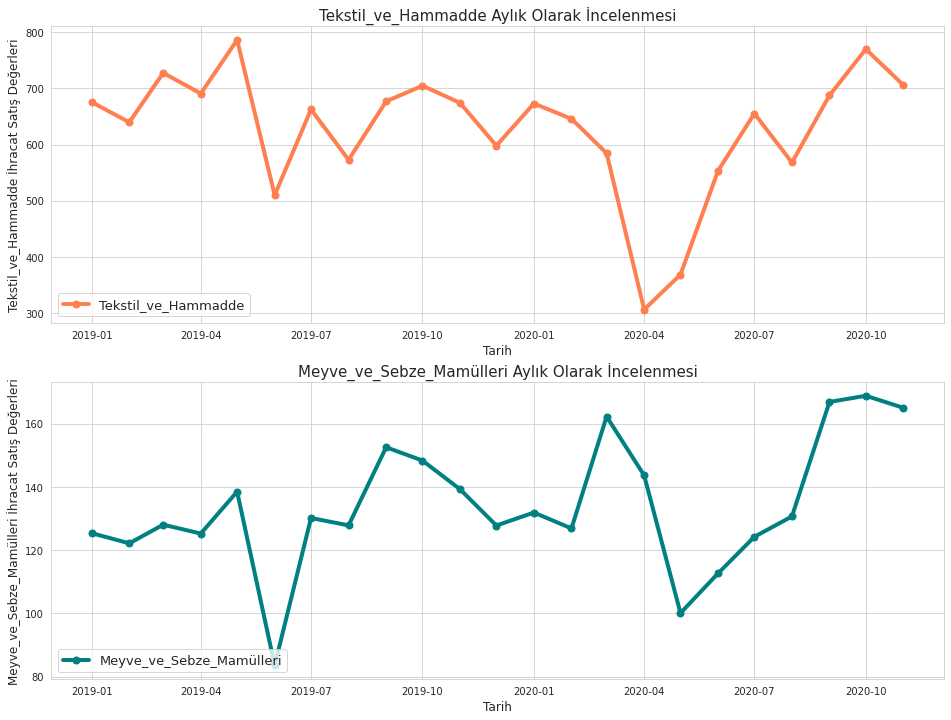

In [10]:
odemeler_t=odemeler[::-1]
bir_odemeler=odemeler_t.rolling(window=1).mean()



liste=["Tekstil_ve_Hammadde","Meyve_ve_Sebze_Mamülleri"]
liste_color=["#FF7F50","#008080"]

fig,ax=plt.subplots(2,1,figsize=(16,12))
for i in range(2):
    ax[i].plot(bir_odemeler[liste[i]],"-",marker="o",lw=4,ms=7,color=liste_color[i])
    ax[i].set_title(str(liste[i])+" Aylık Olarak İncelenmesi",fontsize=15)
    ax[i].set_xlabel("Tarih",fontsize=12)
    ax[i].set_ylabel(liste[i]+" İhracat Satış Değerleri",fontsize=12)
    ax[i].legend([liste[i]],loc="lower left",fontsize=13)

* Fark edileceği üzere Tekstil-Hamamde ihracatı Ocak 2020 ve Temmuz 2020 ayları arasında bir düşüş yaşanmıştır.


* Bunun sebebi ise Korona kaynaklı etkenlerdir.


* Daha sonra yaz aylarının devamında artan bir Trend ile devam etmektedir. 


* Sebze-Meyve Mamülleri ile devam ettiğimizde çok ince bir detay fark edebilirsiniz.


* Ocak 2019 - Temmuz 2019 ayları arasinda Sebze-Meyve ihracatında yılın en düşük satışları gerçekleşmiştir.


* Ardından Korona'nın dünya çapında etkisini artırdığı zamanlarda Ocak 2020 - Temmuz 2020 tarihleri geçen yıla göre daha iyi bir sonuç elde ediliyor.


* Bunun sebebi ise Korona'ya bağlı olarak insanların bağışıklık sistemlerini, dirençlerini daha yüksek tutmak amaçlı sebze-meyveye yöneldiği ve bunun da talebi artırdığını söyleyebiliriz.

## Bar Plot ve Line Plot ile Görselleştirme 

* Tekstil Hammedesi ve Meyve-Sebze Mamüllerini ihracat değelerini bir başka görselleştirme yöntemi olan Bar Plot ve Line Plot iç içe kullanarak görselleştireceğiz.



/shared-libs/python3.7/py/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


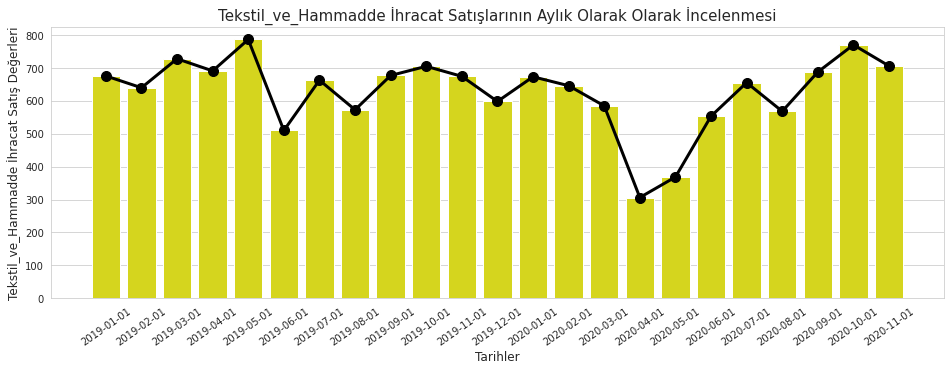

In [11]:
liste=["Tekstil_ve_Hammadde","Meyve_ve_Sebze_Mamülleri"]
plt.figure(figsize=(16,5))
sns.barplot(odemeler["Tarihler"],odemeler[liste[0]],color="#F3F300")
sns.lineplot(odemeler["Tarihler"],odemeler[liste[0]],lw=3,marker="o",color="black",ms=10)
plt.title(str(liste[0])+" İhracat Satışlarının Aylık Olarak Olarak İncelenmesi",fontsize=15)
plt.ylabel(liste[0]+" İhracat Satış Değerleri",fontsize=12)
plt.xlabel("Tarihler",fontsize=12)
plt.xticks(rotation=35);

/shared-libs/python3.7/py/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


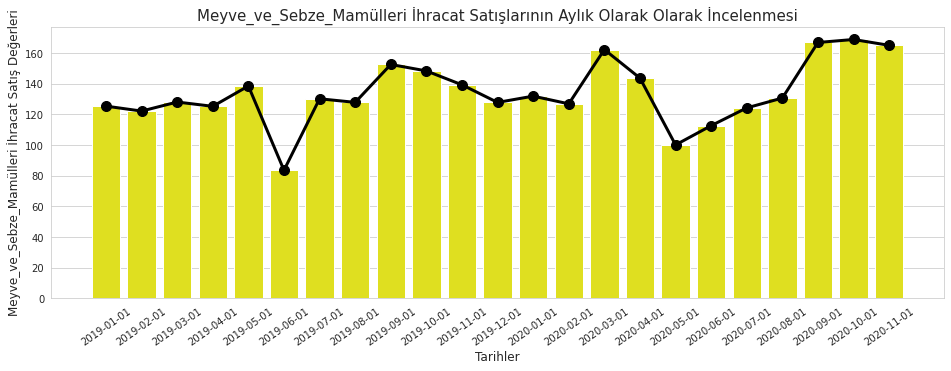

In [12]:
plt.figure(figsize=(16,5))
sns.barplot(odemeler["Tarihler"],odemeler[liste[1]],color="yellow")
sns.lineplot(odemeler["Tarihler"],odemeler[liste[1]],lw=3,marker="o",color="black",ms=10)
plt.title(str(liste[1])+" İhracat Satışlarının Aylık Olarak Olarak İncelenmesi",fontsize=15)
plt.ylabel(liste[1]+" İhracat Satış Değerleri",fontsize=12)
plt.xlabel("Tarihler",fontsize=12)
plt.xticks(rotation=35);

* Tekstil ve Hammadde ihracatında  minimum ihracat değeri 2020 Nisan ayında gerçekleşmiştir. Sonraki aylarda birbirini takip eden artışlar ile satış miktarı yükselmiştir.

* Meyve ve Sebze Mamüllerinin ihracatında ise en düşük değer 2019 Haziran ayında gerçekleşmiştir. Aynı zamanda son 3 ayda en yüksek ortalamalar bulunmaktadır.

* Numerik değişkenler için olan Yoğunluk Grafiği ile devam edelim.

<AxesSubplot:xlabel='Meyve_ve_Sebze_Mamülleri', ylabel='Density'>

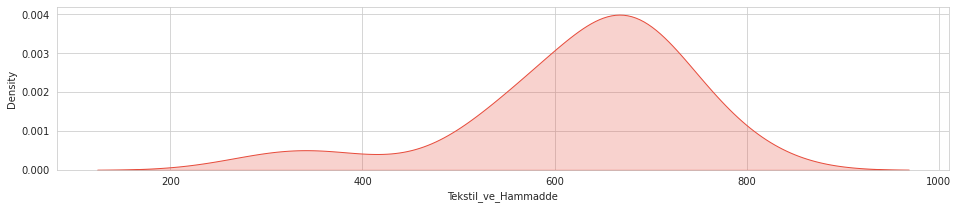

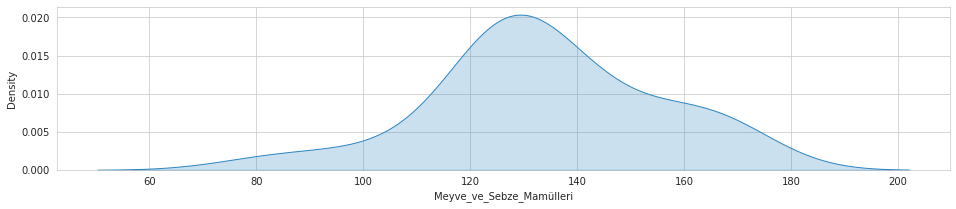

In [13]:
plt.figure(figsize=(16,3))
sns.kdeplot(odemeler[liste[0]],shade=True,color="#E74C3C")

plt.figure(figsize=(16,3))
sns.kdeplot(odemeler[liste[1]],shade=True,color="#2E86C1")

Yoğunluk grafiklerine baktığımızda ise Tekstil-Hammadde ihracatında soldan çarpıklık söz konusudur. Normal bir dağılımda olmadığını görebiliyoruz.
Sebze-Meyve Mamülleri ise normal dağılım görüntüsü vermektedir. Aynı zamanda  bir iki başlılık görülmektedir.

## Faiz, Gram Altın, Bist-100 ve Dolar Değerlerinin İncelenmesi

* Bu başlık altında bahsi geçen ekonomik göstergelerin Türk Lirası cinsinden zamana bağlı olarak hareketlerini inceleyeceğiz.

* Korona etkisinin bu değerler üzerinde ki etkisini görmüş olacağız.

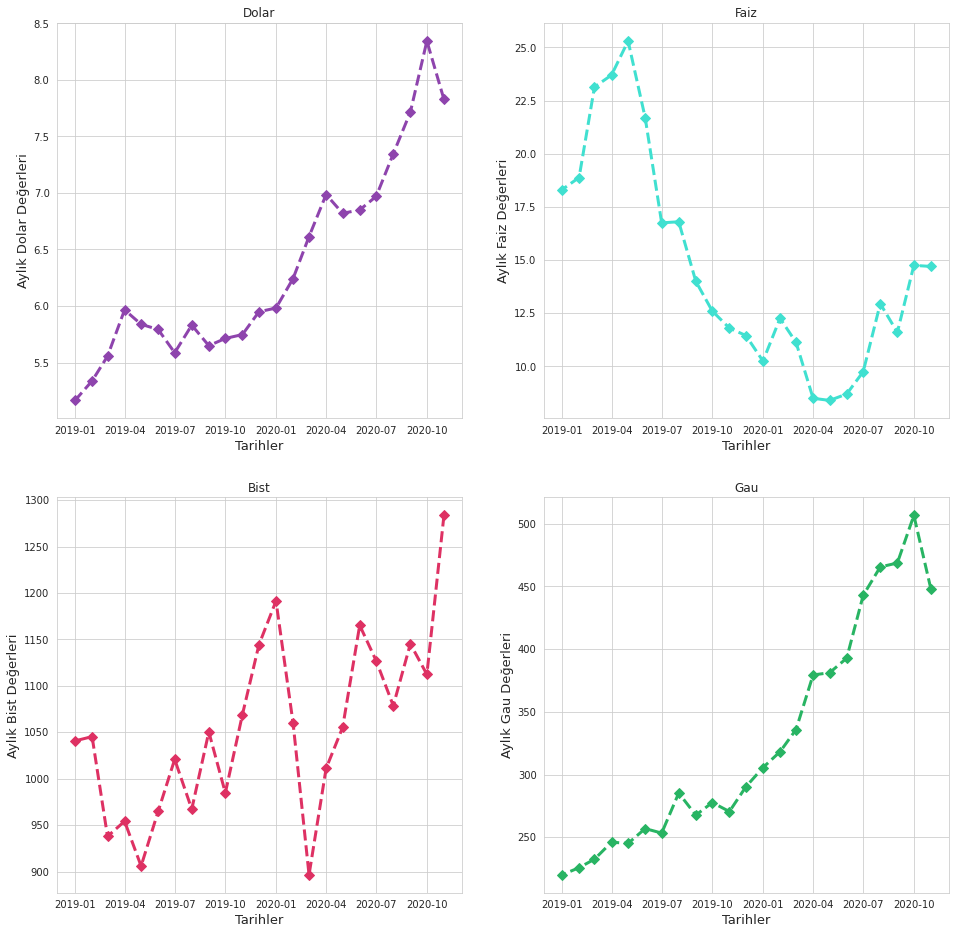

In [14]:
liste=["Dolar","Faiz","Bist","Gau"]
color_list=["#8E44AD","#40E0D0","#DE3163","#28B463"]
fig,ax=plt.subplots(2,2,figsize=(16,16))
count=0
for i in range(2):
    for j in range(2):
        ax[i][j].plot(odemeler[liste[count]],"--",marker='D',lw=3,ms=7,color=color_list[count])
        ax[i][j].set_title(liste[count])
        ax[i][j].set_xlabel("Tarihler",fontsize=13)
        ax[i][j].set_ylabel("Aylık "+liste[count]+" Değerleri",fontsize=13)
        count+=1

* Ele aldığımız göstergelerde Faiz,Doviz,Bist-100,Gram altın değerleri bulunmaktaydı.


* Göze çarpan detaylardan birisi ise; Ocak 2019 başlangıcında Faiz oranları yüksek iken Döviz(Gram Altın-Dolar) düşük olduğunu görüyoruz.


* Korona'nın etkisinin artmasıyla birlikte Döviz kurlarında bir artış gözükmüştür. 


* Faiz oranlarının düşürülmesi bu artışı etkileyen bir diğer faktördür. Faiz oranları Korana'dan dolayı piyasaların canlı kalması adına düşürülmüş ve kredi hacmi yükseltilmişti.


* Ülkemizdeki Faiz oranının düşmesi ve diğer etkenler sonucu Döviz oranlarinda pozitif yönlü bir Trend gerçekleşmiştir.


* Ayni zamanda Bist-100 yani İstanbul Borsası'nın Korona'nın en yoğun oldugu dönemler olan kış aylarında büyük bir düşüş yaşamıştır ardından bahar aylarında iyileşmeler olmuştur. 

## Ülkeler Bazında İşsizlik ve Enflasyon Karşılaştırılması  

* Elimizde Kanada, Çin, ABD, Türkiye, İngiltere, Almanya ait enflasyon ve işsizlik rakamları bulunmakta.

* Ülkelerin Korona süresince nasıl etkilendiğini bahsi geçen iki ekonometrik parametre ile grafik üzerinde işleyeceğiz.


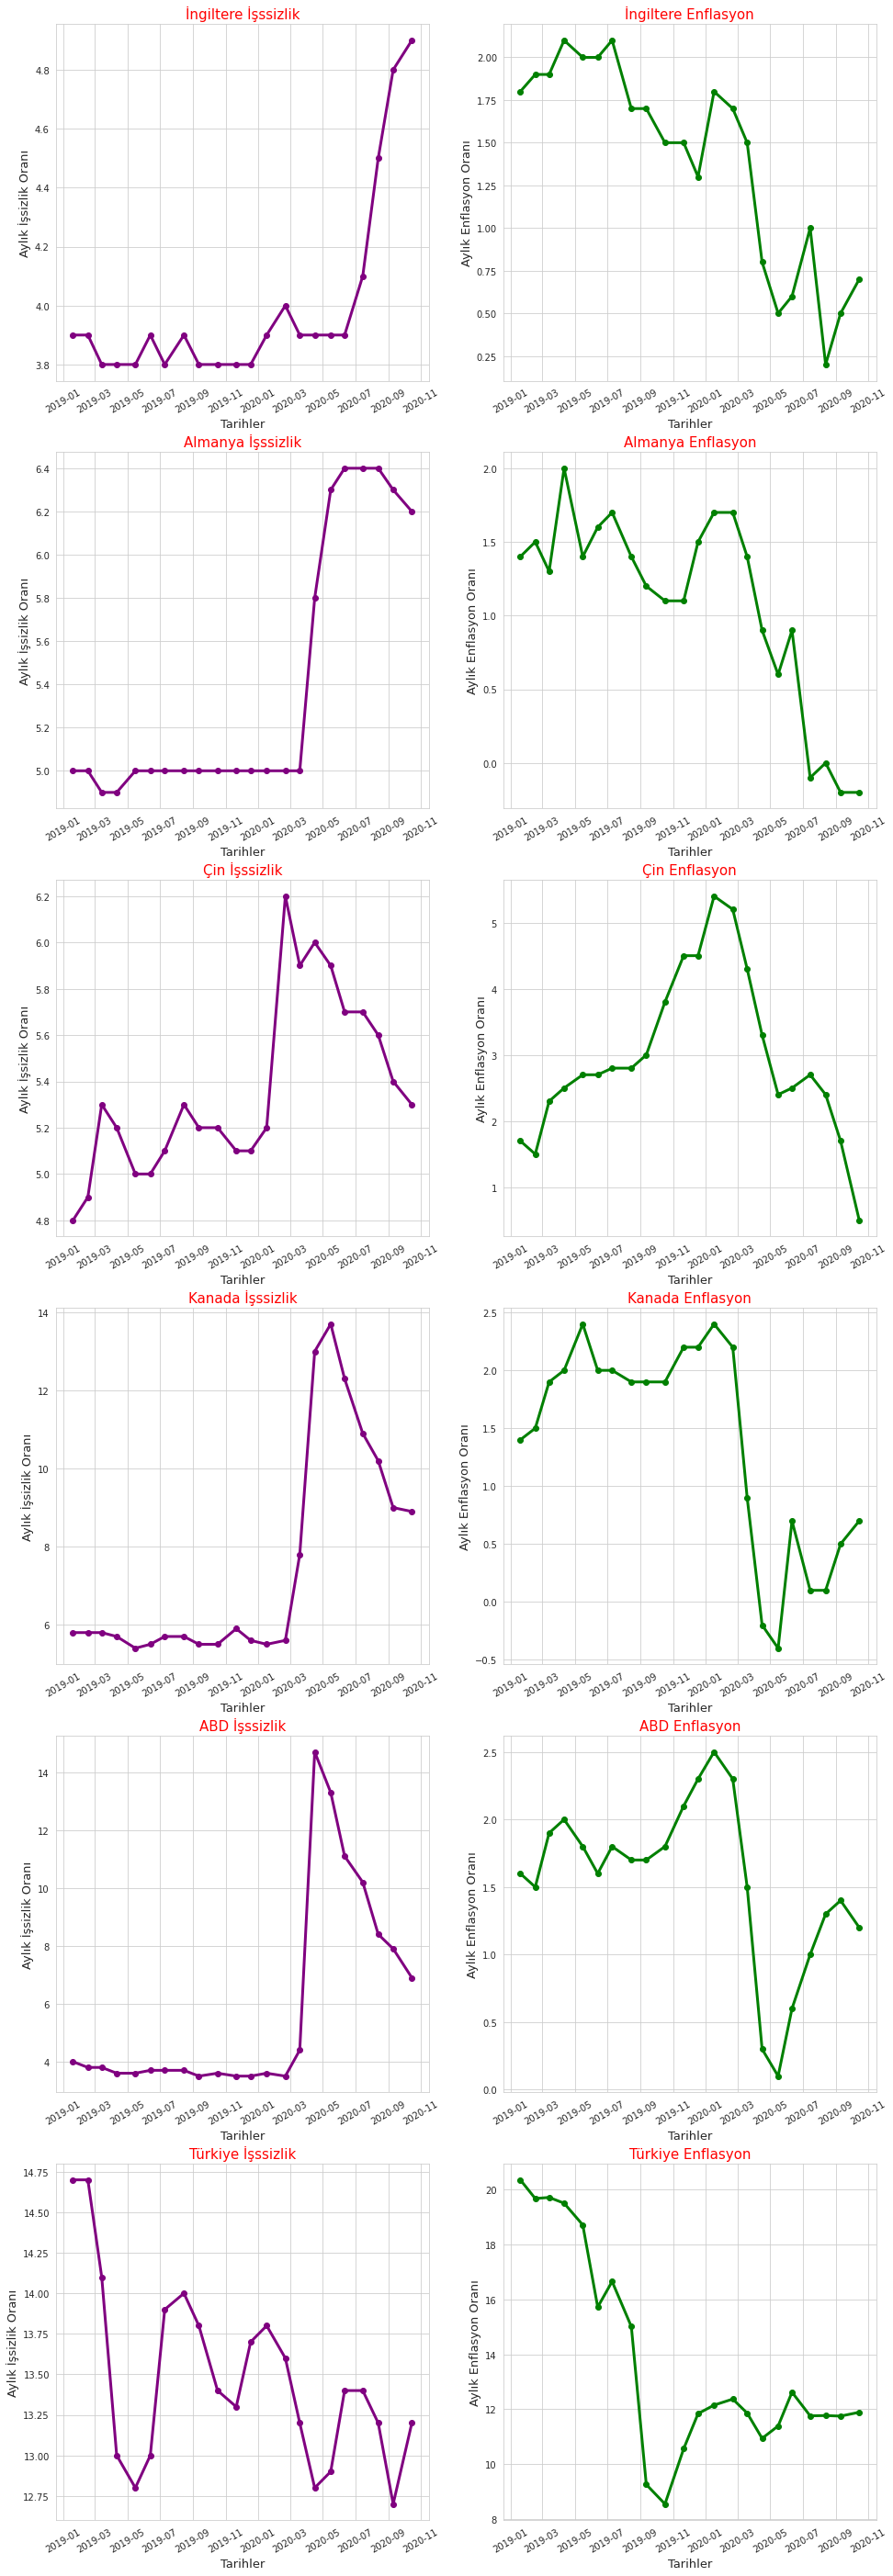

In [15]:
issizlik.index=issizlik["Yayınlanma Tarihi"]
issizlik.index=pd.DatetimeIndex(issizlik.index)
liste=["İngiltere","Almanya","Çin","Kanada","ABD","Türkiye"]

enflasyon.index=enflasyon["Yayınlanma Tarihi"]
enflasyon.index=pd.DatetimeIndex(enflasyon.index)
liste=["İngiltere","Almanya","Çin","Kanada","ABD","Türkiye"]


cols = enflasyon.select_dtypes(include=["float64","int64"]).columns
enflasyon.loc[:,cols] = enflasyon.loc[:,cols]*100
issizlik.loc[:,cols] = issizlik.loc[:,cols]*100

fig,ax=plt.subplots(6,2,figsize=(16,50))
for i in range(6):
        ax[i][0].plot(issizlik[liste[i]],lw=3,marker="o",color="purple")
        ax[i][0].set_title(str(liste[i])+" İşssizlik",color="red",fontsize=15)
        ax[i][0].tick_params(axis='x',labelrotation = 30)
        ax[i][0].set_xlabel("Tarihler",fontsize=13)
        ax[i][0].set_ylabel("Aylık İşsizlik Oranı",fontsize=13)
        
        ax[i][1].plot(enflasyon[liste[i]],lw=3,marker="o",color="green")
        ax[i][1].set_title(str(liste[i])+" Enflasyon",color="red",fontsize=15)
        ax[i][1].tick_params(axis='x',labelrotation = 30)
        ax[i][1].set_xlabel("Tarihler",fontsize=13)
        ax[i][1].set_ylabel("Aylık Enflasyon Oranı",fontsize=13)

#### Korona Öncesi ve Sonrası İşsizlik Oranları

* Almanya-Kanada-ABD-Çin ülkelerinde Korona etkisini göstermesiyle birlikte 2020 yılının 2. ve 3. aylarda bir sıçrama,pick görüyoruz.


* Korono etkisinden dolayı yaşanan panik ve endişe kaynaklı kısıtlamalar gerçekleştirildiği için ülkelerde üretimler durmuş ve işsizlik baş göstermiştir.


* İngiltereye baktığımızda bu trend durumu biraz daha ilerideki aylarda gerçekleşmiştir.


* Türkiye'de ise diğer ülkelerin hepsine göre daha farklı bir grafik görüyoruz.Artış beklenirken ara ara düşüşler ile süreç gerçekleşmiş olarak gözüküyor.


* Bunun bir sebebi şu gösterilebilir.Devlet  tarafından alınan İŞTEN ÇIKARMA YASAKLAMASI ve onun yerine ücretsiz izin düzenlemesi ile aslında işsiz olanlar sonuçlara yansımamıştır.

#### Korona Öncesi ve Sonrası Enflasyon Oranları

* Genel olarak Türkiye ve Çin hariç diğer dört ülke olan ABD-Kanada-Almanya-İngiltere de enflasyon oranı belirli bir aralıkta görülmüştür. 2019 Ocak - 2020 Kasım zaman aralığı boyunca 0 ile 2.5 arasında inişler ve çıkışlar yaşanmıştır.


* Çin'de ise 2019 başlarında düşük bir Enflasyon ile devam ederken Korona zamanlarında artış gerçekleşmiştir.


* Türkiye'de ise artmış yüksek bir değer ile başlayan süreç düşüş ile devam ederken ardından Korona'nın yoğun olduğu zamanlarda belirli bir dalgalanma yaşamıştır.

## İstatistiksel Analiz

* Değişkenlerin birbiri ile olan ilişkisini görmek isteyebiliriz. Yani aralarındaki korelasyonu incelemek bize bilgi edinmek açısından yarar sağlayacaktır.

* Sırasıyla bu degişkenlerin korelasyonunu(birbirleri ile olan ilişkisini) görelim. Ardından istatistiksel testler ile inceleyelim

* Korelasyon incelenirken korelasyon kat sayısının anlamlılığınıda test edelim.

In [ ]:
odemeler[["Tekstil_ve_Hammadde","Meyve_ve_Sebze_Mamülleri","Dolar","Bist","Gau","Faiz"]].corr()

,Tekstil_ve_Hammadde,Meyve_ve_Sebze_Mamülleri,Dolar,Bist,Gau,Faiz
Tekstil_ve_Hammadde,1.000000,0.436669,-0.110765,0.062326,-0.147175,0.470354
Meyve_ve_Sebze_Mamülleri,0.436669,1.000000,0.451554,0.192984,0.388934,-0.177895
Dolar,-0.110765,0.451554,1.000000,0.511088,0.970409,-0.451194
Bist,0.062326,0.192984,0.511088,1.000000,0.574733,-0.535663
Gau,-0.147175,0.388934,0.970409,0.574733,1.000000,-0.572561
Faiz,0.470354,-0.177895,-0.451194,-0.535663,-0.572561,1.000000


* Değiikenlerin birbiri ile olan korelasyonunu tablodaki gibidir. Daha önce de demiştik korelasyon kat sayısının anlamlılığı bu durumda önemli. Şimdi korelasyon kat sayısı anlamlı mı değil mi bunu test edecegiz.

* Onun oncesinde verilerin normal dağılımdan gelip gelmediği varsayimina bakmamız gerekiyor.

## Bu islemi tum degiskenlere uygulamak icin bir fonksiyon yazalim.

In [ ]:
def Shapiro_app(df):
    cols = df.columns
    for i in cols:
        test_istatistigi,p_value = shapiro(df[i])
        if p_value < 0.05:
            print("p-degeri < 0.05 oldugundan H0 red edilemez")
            print(str(i)+" degiskeni normal bir dagilima sahip degildir")
            print("-------------------------------------------------------")
        elif p_value > 0.05:
            
            print("p-degeri > 0.05 oldugundan H0 red edilir")
            print(str(i)+" degiskeni normal bir dagilima sahiptir")
            print("-------------------------------------------------------")

In [ ]:
from scipy.stats import shapiro
Shapiro_app(odemeler[["Tekstil_ve_Hammadde","Meyve_ve_Sebze_Mamülleri","Dolar","Bist","Gau","Faiz"]])

p-degeri < 0.05 oldugundan H0 red edilemez
Tekstil_ve_Hammadde degiskeni normal bir dagilima sahip degildir
-------------------------------------------------------
p-degeri > 0.05 oldugundan H0 red edilir
Meyve_ve_Sebze_Mamülleri degiskeni normal bir dagilima sahiptir
-------------------------------------------------------
p-degeri < 0.05 oldugundan H0 red edilemez
Dolar degiskeni normal bir dagilima sahip degildir
-------------------------------------------------------
p-degeri > 0.05 oldugundan H0 red edilir
Bist degiskeni normal bir dagilima sahiptir
-------------------------------------------------------
p-degeri < 0.05 oldugundan H0 red edilemez
Gau degiskeni normal bir dagilima sahip degildir
-------------------------------------------------------
p-degeri > 0.05 oldugundan H0 red edilir
Faiz degiskeni normal bir dagilima sahiptir
-------------------------------------------------------


* Bazi degiskenler normal dagilima sahip iken bazilarinin olmadigini goruyoruz. Bu durumda normal dagilima sahip olanlar icin PERASON olmayanlar icin SPEARMAN korelasyon kat sayisi testini uygulayabiliriz.

In [ ]:
from scipy.stats import pearsonr, stats
corr, p = stats.spearmanr(odemeler["Tekstil_ve_Hammadde"], odemeler["Dolar"])
print('Spearman correlation: %.3f, P-value score: %.3f' % (corr,p))



Spearman correlation: -0.128, P-value score: 0.559


- Burada sunu denedik Normal dagilima sahip olmayan 2 degisken Tekstil Hammedeleri ihracat verileri ve Dolar aylik ortalamasi arasindaki korelasyon nedir? Ne kadar anlamlidir? 
- Sonuc olarak ise eksi yonlu bir korelasyon gozukse de bu kat sayi anlamli istatistiksel olarak anlamli degildir.
- Yani bir rast gelelik olabilir. 

In [ ]:
corr, p = pearsonr(odemeler["Meyve_ve_Sebze_Mamülleri"], odemeler["Faiz"])
print('Pearsons correlation: %.3f, P-value score: %.3f' % (corr,p))



Pearsons correlation: -0.178, P-value score: 0.417


- Simdi oncesinde Normal dagilim varsayimini saglamayan iki degisken ele almistik. Simdi bu varsayimi saglayan Meyve-Sebze Mamulleri ve Faiz  degiskenin arasindaki korelasyona bakalim.
- Sonuc olarak negatif yonlu dusuk bir korelasyon goruyoruz ama korelasyon kat sayisi p degeri 0.05 den buyuk oldugu icin istatistiksel olarak anlamli degil.


* Simdi Korona etkisinin Teksil Urunleri-Hammedeleri ve Meyve-Sebze Mamulleri satışları uzerinde istatistiksel olarak anlamlı bir değişim etkisine sahip mi onu test edelim.


In [ ]:
import scipy.stats as stats
corona_oncesi_tekstil = odemeler.iloc[11:17,1]
corona_sonrasi_tekstil = odemeler.iloc[5:11,1]

levene_score,p_value=stats.levene(corona_oncesi_tekstil,corona_sonrasi_tekstil)
print('Levet test degeri: %.3f, P-value degeri: %.3f' % (levene_score,p_value))
print("--------------------------------------------------------------")
t_score,p_value=stats.ttest_rel(corona_oncesi_tekstil,corona_sonrasi_tekstil)
print('Bagimli iki orneklem T test degeri: %.3f, P-value degeri: %.3f' % (t_score,p_value))



Levet test degeri: 2.962, P-value degeri: 0.116
--------------------------------------------------------------
Bagimli iki orneklem T test degeri: 1.665, P-value degeri: 0.157


- Sonucu değerlendirecel olursak.

- Varsayımlardan biri olan Varyanslarin Homojenligi test edilmistir ve varyanslar homejendir.
- Bu durumda Parametrik olan Bağımlı İki Örneklem T testi uygulanabilir.
- Bağımlı İki Örneklem T testi sonucunda ise H0 red edilemez sonucuna ulaşıyoruz.
- Koronodan önce ve koronadan sonra 6 ay değerlendirildiğinde Tekstil ürünleri ve hammadesi satışı açısından istatistiksel olarak anlamlı bir sonuc elde edilememiştir.

In [ ]:
import scipy.stats as stats
corona_oncesi_meyve = odemeler.iloc[11:17,2]
corona_sonrasi_meyve = odemeler.iloc[5:11,2]

levene_score,p_value=stats.levene(corona_oncesi_meyve,corona_sonrasi_meyve)
print('Levet test degeri: %.3f, P-value degeri: %.3f' % (levene_score,p_value))
print("--------------------------------------------------------------")
t_score,p_value=stats.ttest_rel(corona_oncesi_meyve,corona_sonrasi_meyve)
print('Bagimli iki orneklem T test degeri: %.3f, P-value degeri: %.3f' % (t_score,p_value))



Levet test degeri: 1.642, P-value degeri: 0.229
--------------------------------------------------------------
Bagimli iki orneklem T test degeri: 1.147, P-value degeri: 0.303


- Ayni süreci bir diğer örneğimiz olan Meyve-Sebze Mamulleri üzerinde uyguluyoruz.
- Elde edilen sonuç benzer. Meyve-Sebze Mamulleri acisindan da koronanin istatistiksel olarak anlamlı bir etkisi yoktur.

In [ ]:
import scipy.stats as stats
corona_oncesi_dolar = odemeler.iloc[11:17,5]
corona_sonrasi_dolar = odemeler.iloc[5:11,5]

levene_score,p_value=stats.levene(corona_oncesi_dolar,corona_sonrasi_dolar)
print('Levet test degeri: %.3f, P-value degeri: %.3f' % (levene_score,p_value))
print("--------------------------------------------------------------")
t_score,p_value=stats.ttest_rel(corona_oncesi_dolar,corona_sonrasi_dolar)
print('Bagimli iki orneklem T test degeri: %.3f, P-value degeri: %.3f' % (t_score,p_value))

Levet test degeri: 14.535, P-value degeri: 0.003
--------------------------------------------------------------
Bagimli iki orneklem T test degeri: -6.035, P-value degeri: 0.002


- Turkiye ticareti için çok önemli olan Dolar kurunu da değerlendirmek uzere ayni süreçleri gerçekleştirmek isteyelim.
- Sonucu yorumlayacak olursak. Korona oncesi ve sonrasi 6 aylik surecte Dolar kurunda istatistiksel olarak anlamli bir farklilik vardir. 